In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import os
import re
root_path = 'log/'

legend_font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }
font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,
    }

colorlist = ['darkorange', 'cyan', 'lightsteelblue', 'plum', 'darkseagreen', 'gold', 'bisque', 'lightgreen', 'gray']
color_rgb_list = [(74/255, 135/255, 161/255), (222/255, 144/255, 123/255), (230/255, 197/255, 180/255), (88/255, 141/255, 106/255), (147/255, 196/255, 212/255), (237/255, 204/255, 134/255), (156/255, 131/255, 131/255), (116/255, 126/255, 73/255), (61/255, 71/255, 59/255), (36/255, 74/255, 96/255)]

def extract_number(feature, data, split_str):
    result_list = []
    for line in data:
        #print(line)
        seg = re.split(split_str, line)
        if set(feature).issubset(set(seg)):
            for item in seg:
                if item.lstrip('-').replace('.', '').replace(',', '').isdigit():
                    item = item.replace(',', '')
                    try:
                        result_list.append(int(item))  
                    except ValueError:
                        result_list.append(float(item))  
                        
    return result_list
                
def process_log(root_path, log_path, steps_feature = ['components'], \
                steps_split = ' |\n', val_split = ' |\n|\)|\(|%', val_features = ['set:', 'Accuracy:', 'Test']):
    with open(root_path + log_path, 'r') as f:
        data = f.readlines()
        steps_list = extract_number(feature = steps_feature, data = data, split_str = steps_split)
        val_list = extract_number(feature = val_features, data = data, split_str = val_split) 
    
    
    if abs(len(steps_list) -  len(val_list)) == 1:
        min_len = min(len(steps_list), len(val_list))
        return steps_list[:min_len], val_list[:min_len]
    else:
        return steps_list, val_list

def process_smooth(steps_list, val_list, smooth_len):
    steps = [0] * len(range(0, len(steps_list)-smooth_len+1, smooth_len))
    vals = [0] * len(steps)
    for i in range(0, len(steps_list)-smooth_len+1, smooth_len):
        steps[i // smooth_len]  = steps_list[i+np.argmin(val_list[i:i+smooth_len])]
        vals[i // smooth_len] = np.min(val_list[i:i+smooth_len])
    return steps, vals

In [3]:
def smooth(r_list,plot_list_len,smooth_len):
    plot_list = []
    for i in range(plot_list_len):
        plot_list.append(np.mean(r_list[i*smooth_len:(i+1)*smooth_len]))
    return plot_list

/tmp/ipykernel_1851234/3426178347.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


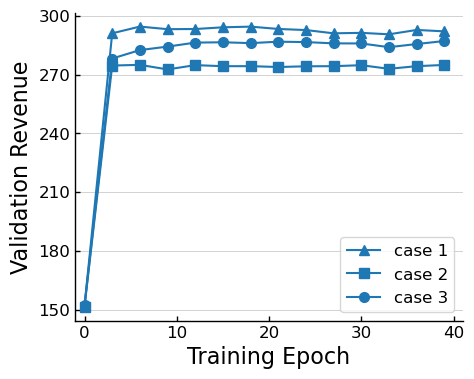

In [11]:
names=['A2C2023-04-30-10-27-43','A2C2023-04-30-10-27-18','A2C2023-04-30-10-28-07']
markers = ['^','s','o']
lines = ['--','-','-.']
labels = ['case 1','case 2','case 3']
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
for i in range(3):
    with open(r'log/' + names[i], 'r') as f:
        data = f.readlines()
        result_list = []
        for line in data:
            if 'initial mean reward' in line:
                seg = re.split(' |\n', line)[-2]
                result_list.append(float(seg))
            if 'validate reward:' in line:
                seg = re.split(' |\n', line)[-2]
                result_list.append(float(seg))
    steps = np.arange(len(result_list))
    x_major_locator=MultipleLocator(4)
    ax1.xaxis.set_major_locator(x_major_locator)
    ax1.plot(steps[::3],result_list[::3],marker=markers[i],markersize=7,color='#1f77b4',label = labels[i])#linestyle=lines[i] ,
ax1.set_xlabel("Training Epoch",size=16)
ax1.set_ylabel('Validation Revenue',size=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax1.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax1.tick_params(direction='in', width=1)
ax1.set_xlim(-1,41)
ax1.set_xticks(steps[::10],size=12)
ax1.set_yticks(range(150,320,30),size=12)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.legend(prop = {'size':12})
plt.savefig(r'plot/'+'reuse_'+'steps_'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show()

/tmp/ipykernel_1851234/3697628699.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


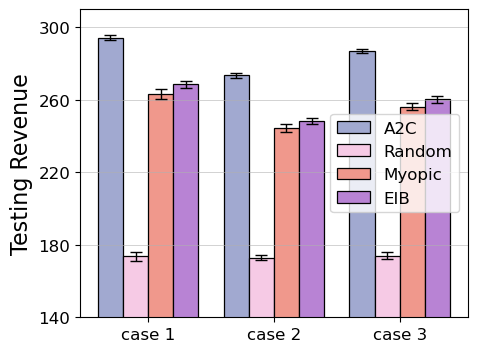

In [12]:
names=['A2C2023-04-30-10-27-43','A2C2023-04-30-10-27-18','A2C2023-04-30-10-28-07']
labels = ['case 1','case 2','case 3']
datas = []
for i in range(4):
    datas.append([])
error = []
for i in range(4):
    error.append([])
for i in range(3):
    with open(r'log/' + names[i], 'r') as f:
        data = f.readlines()
        OA_list = []
        Myopic_list = []
        EIB_list = []
        seller_list = []
        for line in data:
            if 'mean test reward:' in line:
                OA_list.append(float(line.split(',')[-3]))
                Myopic_list.append(float(line.split(',')[-2]))
                EIB_list.append(float(line.split(',')[-1]))
                seller_list.append(float(line.split(',')[-4][-8:]))
        datas[0].append(np.mean(seller_list))
        datas[1].append(np.mean(OA_list))
        datas[2].append(np.mean(Myopic_list))
        datas[3].append(np.mean(EIB_list))
        error[0].append(np.array(seller_list).std())
        error[1].append(np.array(OA_list).std())
        error[2].append(np.array(Myopic_list).std())
        error[3].append(np.array(EIB_list).std())
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))    
colors=['#A1A9D0','#F6CAE5','#F0988C','#B883D4']
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数
# 四组数据
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.2  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
ax.bar(x - 1.5*width, datas[0], width, label='A2C',color = colors[0],edgecolor='black',linewidth=0.9,yerr=error[0],error_kw=error_params)
ax.bar(x - 0.5*width, datas[1], width, label='Random',color = colors[1],edgecolor='black',linewidth=0.9,yerr=error[1],error_kw=error_params)
ax.bar(x + 0.5*width, datas[2], width, label='Myopic',color = colors[2],edgecolor='black',linewidth=0.9,yerr=error[2],error_kw=error_params)
ax.bar(x + 1.5*width, datas[3], width, label='EIB',color = colors[3],edgecolor='black',linewidth=0.9,yerr=error[3],error_kw=error_params)
ax.set_ylim(140,310)
ax.set_yticks(range(140,310,40),size=12)
plt.ylabel('Testing Revenue',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend(loc='center right',prop = {'size':12})
plt.savefig(r'plot/'+'reuse_'+'test'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')
plt.show()